# 2.33 Pandas - Трансформация данных
## "Топ" задач в области чистки данных
- удаление строк с большим количеством отсутствующих значений
- удаление ненужных столбцов
- изменение индексов 
- использование методов .str() для очистки столбцов
- использование .applymap() для очистки всего набора данных поэлементно
- переименование столбцов в более узнаваемый набор меток
- пропуск ненужных строк в файлах
- ...

In [1]:
# подключение пакетов
import pandas as pd, numpy as np, pylab
print(f"\033[38;5;99m pd version: {pd.__version__}\n"
      f"\033[38;5;44m np version: {np.__version__}")

 pd version: 1.3.5
 np version: 1.21.6


## Способы преобразования данных
- применение словаря соответствия
- присоединние нового поля с Series
- пользовательские и анонимные функции
- ...
### Добавление полей

In [2]:
# обучающий пример
df1 = pd.DataFrame({
    'имя': ['Иван', 'Лидия', 'Анна', 'Дмитрий', 
            'Валентина', 'Федор', 'Марина'],
    'возраст': [30, 41, 32, 67, 44, 52, 47],
    'рейтинг': ['90%', '95%', '100%', '82%', '87%', '86%', '93%'],
    'возраст_': [30, 41, None, 67, None, 52, 47],
    'поступления':[10000, 8000, 5500, 6200, 12000, 7300, 11500]
})
df1

,имя,возраст,рейтинг,возраст_,поступления
0,Иван,30,90%,30.0,10000
1,Лидия,41,95%,41.0,8000
2,Анна,32,100%,NaN,5500
3,Дмитрий,67,82%,67.0,6200
4,Валентина,44,87%,NaN,12000
5,Федор,52,86%,52.0,7300
6,Марина,47,93%,47.0,11500


In [3]:
# словарь соответствия
gender = {'Иван':'M', 'Лидия':'Ж', 'Анна':"Ж", 'Дмитрий':"М", 
          'Валентина':"Ж", 'Федор':"М", 'Марина':"Ж"}
# создание нового поля данных со словарем
df1['пол'] = df1['имя'].map(gender)
df1

,имя,возраст,рейтинг,возраст_,поступления,пол
0,Иван,30,90%,30.0,10000,M
1,Лидия,41,95%,41.0,8000,Ж
2,Анна,32,100%,NaN,5500,Ж
3,Дмитрий,67,82%,67.0,6200,М
4,Валентина,44,87%,NaN,12000,Ж
5,Федор,52,86%,52.0,7300,М
6,Марина,47,93%,47.0,11500,Ж


In [4]:
# присоединение нового поля с Series
last_names = pd.Series(
    ['Поленов', 'Жихарева', 'Морозова', 'Смирнов', 
     'Нестеренко', 'Нефедов', 'Григорьева'], index=df1['имя'])
df1['фамилия'] = df1['имя'].map(last_names)
df1

,имя,возраст,рейтинг,возраст_,поступления,пол,фамилия
0,Иван,30,90%,30.0,10000,M,Поленов
1,Лидия,41,95%,41.0,8000,Ж,Жихарева
2,Анна,32,100%,NaN,5500,Ж,Морозова
3,Дмитрий,67,82%,67.0,6200,М,Смирнов
4,Валентина,44,87%,NaN,12000,Ж,Нестеренко
5,Федор,52,86%,52.0,7300,М,Нефедов
6,Марина,47,93%,47.0,11500,Ж,Григорьева


In [5]:
# пользовательские функции 
mean_income = df1['поступления'].mean()
def higher_income(x):
    return x > mean_income
df1['поступления_больше_среднего'] = df1['поступления'].map(higher_income)
df1

,имя,возраст,рейтинг,возраст_,поступления,пол,фамилия,поступления_больше_среднего
0,Иван,30,90%,30.0,10000,M,Поленов,True
1,Лидия,41,95%,41.0,8000,Ж,Жихарева,False
2,Анна,32,100%,NaN,5500,Ж,Морозова,False
3,Дмитрий,67,82%,67.0,6200,М,Смирнов,False
4,Валентина,44,87%,NaN,12000,Ж,Нестеренко,True
5,Федор,52,86%,52.0,7300,М,Нефедов,False
6,Марина,47,93%,47.0,11500,Ж,Григорьева,True


In [6]:
# применение анонимной функции
df1['поступления_больше_среднего'] = \
df1['поступления'].map(lambda x: x > mean_income)
df1

,имя,возраст,рейтинг,возраст_,поступления,пол,фамилия,поступления_больше_среднего
0,Иван,30,90%,30.0,10000,M,Поленов,True
1,Лидия,41,95%,41.0,8000,Ж,Жихарева,False
2,Анна,32,100%,NaN,5500,Ж,Морозова,False
3,Дмитрий,67,82%,67.0,6200,М,Смирнов,False
4,Валентина,44,87%,NaN,12000,Ж,Нестеренко,True
5,Федор,52,86%,52.0,7300,М,Нефедов,False
6,Марина,47,93%,47.0,11500,Ж,Григорьева,True


In [7]:
# еще один вариант
df1['поступления_больше_среднего'] = df1['поступления'] > mean_income
df1

,имя,возраст,рейтинг,возраст_,поступления,пол,фамилия,поступления_больше_среднего
0,Иван,30,90%,30.0,10000,M,Поленов,True
1,Лидия,41,95%,41.0,8000,Ж,Жихарева,False
2,Анна,32,100%,NaN,5500,Ж,Морозова,False
3,Дмитрий,67,82%,67.0,6200,М,Смирнов,False
4,Валентина,44,87%,NaN,12000,Ж,Нестеренко,True
5,Федор,52,86%,52.0,7300,М,Нефедов,False
6,Марина,47,93%,47.0,11500,Ж,Григорьева,True


In [8]:
# пользовательские функции
def interview(row):
    return row['возраст'] < 50 and row['поступления'] > 7500
df1['интервью'] = df1.apply(interview, axis=1)
df1

,имя,возраст,рейтинг,возраст_,поступления,пол,фамилия,поступления_больше_среднего,интервью
0,Иван,30,90%,30.0,10000,M,Поленов,True,True
1,Лидия,41,95%,41.0,8000,Ж,Жихарева,False,True
2,Анна,32,100%,NaN,5500,Ж,Морозова,False,False
3,Дмитрий,67,82%,67.0,6200,М,Смирнов,False,False
4,Валентина,44,87%,NaN,12000,Ж,Нестеренко,True,True
5,Федор,52,86%,52.0,7300,М,Нефедов,False,False
6,Марина,47,93%,47.0,11500,Ж,Григорьева,True,True


In [9]:
# передача аргументов трансформирующей функции
def bonus(row, amount, give=False):
    if give:
        return row['поступления'] / row['возраст'] * amount
    else:
        return 0
df1['премия'] = df1.apply(bonus,args=(6.5,),give=True,axis=1)
df1.T

,0,1,2,3,4,5,6
имя,Иван,Лидия,Анна,Дмитрий,Валентина,Федор,Марина
возраст,30,41,32,67,44,52,47
рейтинг,90%,95%,100%,82%,87%,86%,93%
возраст_,30.0,41.0,NaN,67.0,NaN,52.0,47.0
поступления,10000,8000,5500,6200,12000,7300,11500
пол,M,Ж,Ж,М,Ж,М,Ж
фамилия,Поленов,Жихарева,Морозова,Смирнов,Нестеренко,Нефедов,Григорьева
поступления_больше_среднего,True,False,False,False,True,False,True
интервью,True,True,False,False,True,False,True
премия,2166.666667,1268.292683,1117.1875,601.492537,1772.727273,912.5,1590.425532


In [10]:
# встроенный метод assign()
df1 = df1.assign(премия_годовая=df1['премия']*4)
df1.T

,0,1,2,3,4,5,6
имя,Иван,Лидия,Анна,Дмитрий,Валентина,Федор,Марина
возраст,30,41,32,67,44,52,47
рейтинг,90%,95%,100%,82%,87%,86%,93%
возраст_,30.0,41.0,NaN,67.0,NaN,52.0,47.0
поступления,10000,8000,5500,6200,12000,7300,11500
пол,M,Ж,Ж,М,Ж,М,Ж
фамилия,Поленов,Жихарева,Морозова,Смирнов,Нестеренко,Нефедов,Григорьева
поступления_больше_среднего,True,False,False,False,True,False,True
интервью,True,True,False,False,True,False,True
премия,2166.666667,1268.292683,1117.1875,601.492537,1772.727273,912.5,1590.425532


### Преобразование рамки данных полностью

In [11]:
# обучающий пример с пропущенными значениями
df2 = pd.DataFrame(
    [[1, 2.12, 3.2674, 4.1, 2.89076], 
     [3.356, 4.567, 2.1, 1.8, np.nan],
     [58, 0, 119, 3399, 398209]],
     columns=[f'col{i+1}' for i in range(5)])
df2

,col1,col2,col3,col4,col5
0,1.000,2.120,3.2674,4.1,2.89076
1,3.356,4.567,2.1000,1.8,NaN
2,58.000,0.000,119.0000,3399.0,398209.00000


In [12]:
# анонимной функцией
df2t = df2.applymap(lambda x: len(str(x)),na_action='ignore')
df2t

,col1,col2,col3,col4,col5
0,3,4,6,3,7.0
1,5,5,3,3,NaN
2,4,3,5,6,8.0


In [13]:
# с помощью других модулей (например, масштабирование)
from sklearn.preprocessing import MinMaxScaler
df2t.loc[:,:] = MinMaxScaler().fit_transform(df2t.to_numpy())
df2t

,col1,col2,col3,col4,col5
0,0.0,0.5,1.000000,0.0,0.0
1,1.0,1.0,0.000000,0.0,NaN
2,0.5,0.0,0.666667,1.0,1.0


### Дополнительная информация

In [14]:
# обучающий пример временных данных
df3 = pd.DataFrame({'time': ['23-02-12 10:12','23-02-13 10:45']})
df3['time'] = pd.to_datetime(df3['time'], format='%y-%m-%d %H:%M')
# округление до ближайшего часа, вверх и вниз
df3['rounded'] = df3['time'].dt.round('1H')
df3['ceil'] = df3['time'].dt.ceil('1H')
df3['floor'] = df3['time'].dt.floor('1H')
# учет геопозиции
df3['moscow_time'] = df3['time'] + pd.Timedelta(hours=3)
# номер дня в неделе
df3['weekday'] = df3['time'].dt.weekday
df3

,time,rounded,ceil,floor,moscow_time,weekday
0,2023-02-12 10:12:00,2023-02-12 10:00:00,2023-02-12 11:00:00,2023-02-12 10:00:00,2023-02-12 13:12:00,6
1,2023-02-13 10:45:00,2023-02-13 11:00:00,2023-02-13 11:00:00,2023-02-13 10:00:00,2023-02-13 13:45:00,0


In [15]:
# визуальная трансформация
def apply_styler(f):
    def inf(df):
        return df.style.apply(f)
    return inf
@apply_styler
def pos_neg(x,bc="whitesmoke",posc="#EE2E31",negc="#31D843"):
    style_pos = f"background-color:{bc}; color:{posc}; font-weight:bold;"
    style_neg = f"background-color:{bc}; color:{negc}; font-weight:bold;"
    return [style_pos if i else style_neg for i in x >= 0] 

In [16]:
idx=[f'id{i+1}' for i in range(7)]
cols=[f'col{i+1}' for i in range(5)]
df4 = pd.DataFrame(np.random.randn(7,5),index=idx,columns=cols)
pos_neg(df4)

,col1,col2,col3,col4,col5
id1,-0.254039,0.629768,0.057682,-0.258211,2.731276
id2,1.162260,-0.416194,0.780186,-0.382241,0.059396
id3,0.103347,-0.272493,-0.447430,-0.340568,-1.793302
id4,-0.828858,0.278151,-0.885900,1.718032,0.746751
id5,-1.645903,0.555568,-1.423469,0.860376,1.833737
id6,0.374329,-0.047185,1.785488,0.321343,-0.308253
id7,-0.660090,1.342633,-1.015992,0.352666,-1.506932


### Извлечение фрагментов



In [17]:
# запросом с логическим выражением
df4.loc[df4.sample(frac=.3).index,'col5'] = np.nan
df4.query('col1 > col3')

,col1,col2,col3,col4,col5
id2,1.162260,-0.416194,0.780186,-0.382241,0.059396
id3,0.103347,-0.272493,-0.447430,-0.340568,-1.793302
id4,-0.828858,0.278151,-0.885900,1.718032,NaN
id7,-0.660090,1.342633,-1.015992,0.352666,-1.506932


In [18]:
# с глобальной переменной и методами
n = 0
df4.query('col5 < @n | col5.isnull()',engine='python')

,col1,col2,col3,col4,col5
id1,-0.254039,0.629768,0.057682,-0.258211,NaN
id3,0.103347,-0.272493,-0.447430,-0.340568,-1.793302
id4,-0.828858,0.278151,-0.885900,1.718032,NaN
id6,0.374329,-0.047185,1.785488,0.321343,-0.308253
id7,-0.660090,1.342633,-1.015992,0.352666,-1.506932


In [19]:
# пересечение источников информации
d1 = {1:1,2:22,3:33}
d2 = {'a':range(5),'b':range(15,5,-2),'c':['|','&','&','&','|']}
ds4 = pd.Series(d1)
df5 = pd.DataFrame(d2)
# совпадение с ключами словаря d1 и в индексами серии ds4
display(df5.query('a in @d1'),df5.query('a in @ds4.index'))
# совпадение со значениями в серии ds4
display(df5.query('a in @ds4'))

,a,b,c
1,1,13,&
2,2,11,&
3,3,9,&


,a,b,c
1,1,13,&
2,2,11,&
3,3,9,&


,a,b,c
1,1,13,&


In [20]:
d2 = {'a':range(2,7),'b':range(15,5,-2),'c':['|','&','&','&','|']}
d3 = {1:range(5,0,-1),2:range(7,16,2),3:list('abcde')}
df5,df6 = pd.DataFrame(d2),pd.DataFrame(d3)
# значения в df5.a, имеющиеся в df6.index
display(df5.query('a in @df6.index'))

,a,b,c
0,2,15,|
1,3,13,&
2,4,11,&


### Объединение данных



In [21]:
# генератор рамок данных
def dgen(m,n):
    return (
        pd.DataFrame(
            {l:[f"{l}_{j+1}_{i}" for i in range(j*m,(j+1)*m)] 
             for l in list('ABCDE')},index=range(j*m,(j+1)*m)) 
        for j in range(n))
display(*tuple(dgen(2,3)))

,A,B,C,D,E
0,A_1_0,B_1_0,C_1_0,D_1_0,E_1_0
1,A_1_1,B_1_1,C_1_1,D_1_1,E_1_1


,A,B,C,D,E
2,A_2_2,B_2_2,C_2_2,D_2_2,E_2_2
3,A_2_3,B_2_3,C_2_3,D_2_3,E_2_3


,A,B,C,D,E
4,A_3_4,B_3_4,C_3_4,D_3_4,E_3_4
5,A_3_5,B_3_5,C_3_5,D_3_5,E_3_5


In [22]:
# объект с иерархической индексацией
dc = pd.concat(
    list(dgen(2,3)),
    keys=[f"id{i+1}" for i in range(3)])
dc

A      B      C      D      E
id1 0  A_1_0  B_1_0  C_1_0  D_1_0  E_1_0
    1  A_1_1  B_1_1  C_1_1  D_1_1  E_1_1
id2 2  A_2_2  B_2_2  C_2_2  D_2_2  E_2_2
    3  A_2_3  B_2_3  C_2_3  D_2_3  E_2_3
id3 4  A_3_4  B_3_4  C_3_4  D_3_4  E_3_4
    5  A_3_5  B_3_5  C_3_5  D_3_5  E_3_5

|`Merge`|`SQL Join`|Описание|
|--|--|--|
|`left`|`LEFT OUTER JOIN`|ключевые поля (keys) только из таблицы слева|
|`right`|`RIGHT OUTER JOIN`|ключевые поля (keys) только из таблицы справа|
|`outer`|`FULL OUTER JOIN`| объединение (union) keys из обеих таблиц|
|`inner`|`INNER JOIN`|пересечение (intersection) keys из обеих таблиц|
|`cross`|`CROSS JOIN`|прямое произведение (cartesian product) строк из обеих таблиц|

In [23]:
# по умолчанию how='inner'
dfl = pd.DataFrame({"🔑1":["🐕","🐕","🐈","🐎"],
                    "🔑2":["🐕","🐈","🐕","🐈"],
                    "🌹":["🌹0","🌹1","🌹2","🌹3"],
                    "🌻":["🌻0","🌻1","🌻2","🌻3"]})
dfr = pd.DataFrame({"🔑1":["🐕","🐈","🐈","🐎"],
                    "🔑2":["🐕","🐕","🐕","🐕"],
                    "🐝":["🐝0","🐝1","🐝2","🐝3"],
                    "🐞":["🐞0","🐞1","🐞2","🐞3"]})
display(dfl,dfr,pd.merge(dfl,dfr,on=["🔑1","🔑2"]))

,🔑1,🔑2,🌹,🌻
0,🐕,🐕,🌹0,🌻0
1,🐕,🐈,🌹1,🌻1
2,🐈,🐕,🌹2,🌻2
3,🐎,🐈,🌹3,🌻3


,🔑1,🔑2,🐝,🐞
0,🐕,🐕,🐝0,🐞0
1,🐈,🐕,🐝1,🐞1
2,🐈,🐕,🐝2,🐞2
3,🐎,🐕,🐝3,🐞3


,🔑1,🔑2,🌹,🌻,🐝,🐞
0,🐕,🐕,🌹0,🌻0,🐝0,🐞0
1,🐈,🐕,🌹2,🌻2,🐝1,🐞1
2,🐈,🐕,🌹2,🌻2,🐝2,🐞2


## Примеры обработки реальных данных
### #1

In [24]:
# пример подготовленного для работы файла данных
url='https://raw.githubusercontent.com/'+\
    'OlgaBelitskaya/machine_learning_engineer_nd009/'+\
    'master/Machine_Learning_Engineer_ND_P3/customers.csv'
customers = pd.read_csv(url)
# применение методов определения отсутствующих значений и суммирования
customers.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

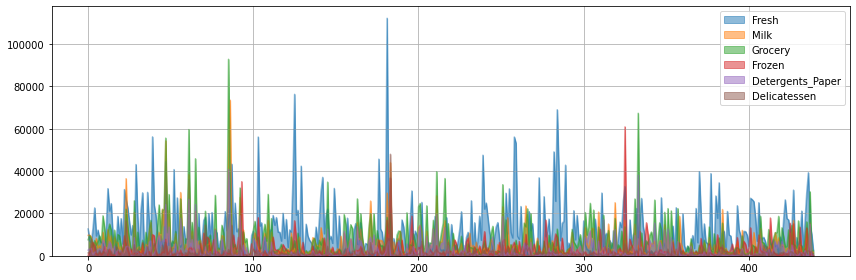

In [25]:
# удаление столбцов, не участвующих в визуальном анализе
customers.drop(['Region','Channel'],axis=1,inplace=True)
# использование методов plot.area() 
customers.plot.area(stacked=False,figsize=(12,4))
pylab.grid(); pylab.tight_layout(); 

### #2

In [26]:
# финансовые данные открытого доступа
path='https://raw.githubusercontent.com/OlgaBelitskaya/'+\
     'machine_learning_engineer_nd009/'+\
     'master/Machine_Learning_Engineer_ND_P6/'
macro=pd.read_csv(path+'macro.csv')
# случайная выборка
macro.sample(10).T[0:10]

,146,2183,759,1343,2380,589,337,1421,1022,1986
timestamp,2010-05-27,2015-12-24,2012-01-30,2013-09-05,2016-07-08,2011-08-13,2010-12-04,2013-11-22,2012-10-19,2015-06-10
oil_urals,73.05,36.7805,109.91,111.3933,43.6614,109.31,89.56,107.9176,110.23,61.4105
gdp_quart,9995.8,21294.4,16876.6,17015.1,19979.4,14313.7,12086.5,18543.5,17442.1,18209.7
gdp_quart_growth,4.1,-3.7,5.2,1.2,-0.6,3.3,3.8,1.3,3.1,-2.8
cpi,320.7,506.4,357.8,398.5,527.2,354.0,333.6,401.6,376.2,489.5
ppi,361.3,581.6,445.4,486.7,605.3,420.7,393.7,487.9,487.0,568.9
gdp_deflator,NaN,123.661,100.0,108.299,133.16,86.721,NaN,108.299,100.0,123.661
balance_trade,15.654,10.108,21.939,16.474,9.085,15.459,11.81,15.777,17.37,16.416
balance_trade_growth,14.1,-3.4,34.4,5.1,-0.9,10.1,2.2,10.5,7.6,32.9
usdrub,30.5388,70.3149,30.414,33.4323,63.8615,29.101,31.1838,32.7643,30.8913,54.3715


In [27]:
# неподготовленные данные для обработки
# более распространенная ситуация
pd.DataFrame(
    macro.isnull().sum()[macro.isnull().sum()!=0],
    columns=['nan_count'])\
.sort_values(by='nan_count',ascending=False).head(10)

,nan_count
provision_retail_space_modern_sqm,1754
provision_retail_space_sqm,1753
modern_education_share,1389
old_education_build_share,1389
theaters_viewers_per_1000_cap,1023
hospital_beds_available_per_cap,1023
hospital_bed_occupancy_per_year,1023
grp_growth,1023
museum_visitis_per_100_cap,1023
population_reg_sports_share,1023


### #3

In [28]:
file_path='https://raw.githubusercontent.com/OlgaBelitskaya/'+\
          'data/main/external_json/'
school_edu = pd.read_json(file_path+'h7rb-945c.json')
# столбцы для формирования рамки данных
columns = ['dbn','total_students','graduation_rate','attendance_rate',
           'latitude','longitude','city','council_district']
# удаление записей с отсутствующими значениями
# переопределение типа данных
school_edu = school_edu[columns]\
.dropna().astype({'council_district':'int'})
school_edu.head()

,dbn,total_students,graduation_rate,attendance_rate,latitude,longitude,city,council_district
0,08X519,242,0.49,0.81,40.820486,-73.881187,Bronx,17
1,13K350,268,0.83,0.81,40.697330,-73.984528,Brooklyn,33
2,28Q680,704,0.97,0.96,40.718027,-73.805923,Jamaica,24
3,08X282,305,0.6,0.79,40.815040,-73.856070,Bronx,18
4,25Q285,566,0.94,0.93,40.764884,-73.789365,Flushing,19


In [29]:
# не является отсутствующим значением по умолчанию
school_edu.loc[281]['graduation_rate']

'N/A'

In [30]:
# graduation_rate должен быть численным
school_edu.dtypes

dbn                  object
total_students        int64
graduation_rate      object
attendance_rate     float64
latitude            float64
longitude           float64
city                 object
council_district      int64
dtype: object

In [31]:
# сведения о количестве строковых значений
len(school_edu[school_edu['graduation_rate']=='N/A'])

43

In [32]:
# общее количество записей (строки и столбцы)
school_edu.shape

(422, 8)

In [33]:
# применение методов строк для замены данных
school_edu['graduation_rate']=\
school_edu['graduation_rate'].str.replace("N/A","0")
# превращение в вещественные значения
school_edu['graduation_rate']=\
school_edu['graduation_rate'].astype(np.float64)
# учет того факта, что значения отсутствуют
# альтернативный метод - создать дополнительный столбец
# с указанием на строки, где замена на ноль произошла
school_edu['graduation_rate'].replace(0,np.NaN,inplace=True)
# graduation_rate стал численным
school_edu.dtypes

dbn                  object
total_students        int64
graduation_rate     float64
attendance_rate     float64
latitude            float64
longitude           float64
city                 object
council_district      int64
dtype: object

In [34]:
school_edu.isna().sum()

dbn                  0
total_students       0
graduation_rate     43
attendance_rate      0
latitude             0
longitude            0
city                 0
council_district     0
dtype: int64